In [1]:
import sys
sys.path.insert(0, '../')
import picea
picea.__version__,picea

('0.0.3_beta1', <module 'picea' from '../picea/__init__.py'>)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from picea import SequenceCollection

In [62]:
s = SequenceCollection()

seq1 = 'ACGTAGCAG'
seq2 = 'CCGTCGCAGA'
seq3 = 'ACGTAG-CA'

for seq in [seq1,seq2,seq3]:
    s['s'] = seq
s

../picea/sequence.py:107: UserWarning: Turning duplicate header "s" into unique header
  warn(f'Turning duplicate header "{header}" into unique header')


In [63]:
s.headers

['s', 's_1', 's_2']

In [65]:
del s['s']

AttributeError: __delitem__

In [68]:
a = dict(a=1, b=2)
a['c']

KeyError: 'c'

In [74]:
a = np.array([
    [1,2,3],
    [3,4,5]
])

np.delete(a, 0, axis=0)

array([[3, 4, 5]])

In [5]:
from matplotlib.colors import ListedColormap, BoundaryNorm

codes = np.array([*b'AaCcGgNnTt-'], dtype='uint8')
colors = np.array([
    *['green'] * 2,
    *['red'] * 2,
    *['blue'] * 2,
    *['gray'] * 2,
    *['darkorange'] * 2,
    'black'
])

order = np.argsort(codes) 
list(zip(codes[order],
colors[order]))



[(45, 'black'),
 (65, 'green'),
 (67, 'red'),
 (71, 'blue'),
 (78, 'gray'),
 (84, 'darkorange'),
 (97, 'green'),
 (99, 'red'),
 (103, 'blue'),
 (110, 'gray'),
 (116, 'darkorange')]

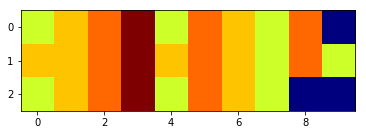

In [6]:
cmap = ListedColormap(colors[order])
norm = BoundaryNorm([0,*codes[order]], ncolors=codes.size)

plt.imshow(norm(s._collection), cmap='jet')

In [36]:
import wget 
fasta_file = wget.download('https://molb7621.github.io/workshop/_downloads/sample.fa')
seq = SequenceCollection.from_fasta(filename=fasta_file)
seq_aligned = seq.align()

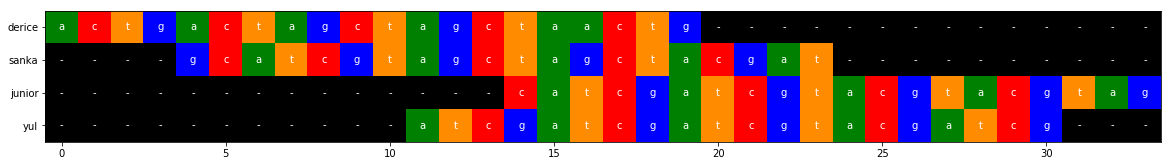

In [43]:
picea.msa_plot(seq_aligned)

In [41]:
seq._collection.view('S1')

array([[b'A', b'C', b'T', b'G', b'A', b'C', b'T', b'A', b'G', b'C', b'T',
        b'A', b'G', b'C', b'T', b'A', b'A', b'C', b'T', b'G'],
       [b'G', b'C', b'A', b'T', b'C', b'G', b'T', b'A', b'G', b'C', b'T',
        b'A', b'G', b'C', b'T', b'A', b'C', b'G', b'A', b'T'],
       [b'C', b'A', b'T', b'C', b'G', b'A', b'T', b'C', b'G', b'T', b'A',
        b'C', b'G', b'T', b'A', b'C', b'G', b'T', b'A', b'G'],
       [b'A', b'T', b'C', b'G', b'A', b'T', b'C', b'G', b'A', b'T', b'C',
        b'G', b'T', b'A', b'C', b'G', b'A', b'T', b'C', b'G']],
      dtype='|S1')

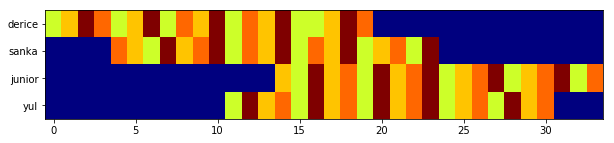

In [54]:
fig,ax = plt.subplots(figsize=(10, 2))
ax.imshow(norm(seq_aligned._collection), cmap='jet', aspect='auto')
for i in range(seq_aligned.n_chars):
    for j in range(seq_aligned.n_seqs):
        #ax.text(i,j,seq_aligned._collection.view('S1')[j,i].decode(),
        #       ha="center", va="center", color="w")
        pass
ax.set_yticks(np.arange(seq_aligned.n_seqs))
ax.set_yticklabels(seq_aligned.headers)
None  

In [10]:
s.sequences

['acgtagcag-', 'ccgtcgcaga', 'acgtagca--']

In [11]:
s = SequenceCollection.from_fasta(string='>s\nACGT\n>s1\najscjasc')
s.headers,s.sequences,s._collection

(['s', 's1'],
 ['ACGT', 'ajscjasc'],
 array([[ 65,  67,  71,  84,  45,  45,  45,  45],
        [ 97, 106, 115,  99, 106,  97, 115,  99]], dtype=uint8))

In [12]:
s = SequenceCollection()
s['s1'] = 'akj'
print(s.headers,s.sequences,s._collection)
s['s2'] = 'ashdajsdlajsjdljkasldjlasjkd'
print(s.headers,s.sequences,s._collection)

['s1'] ['akj'] [[ 97 107 106]]
['s1', 's2'] ['akj', 'ashdajsdlajsjdljkasldjlasjkd'] [[ 97 107 106  45  45  45  45  45  45  45  45  45  45  45  45  45  45  45
   45  45  45  45  45  45  45  45  45  45]
 [ 97 115 104 100  97 106 115 100 108  97 106 115 106 100 108 106 107  97
  115 108 100 106 108  97 115 106 107 100]]


In [13]:
fasta = '>A\nABC\n>B\nDEF'
seq = SequenceCollection.from_fasta(string=fasta)
seq.to_fasta() == fasta

True

In [59]:
(seq._collection + 1).view('S1')

array([[b'B', b'D', b'U', b'H', b'B', b'D', b'U', b'B', b'H', b'D', b'U',
        b'B', b'H', b'D', b'U', b'B', b'B', b'D', b'U', b'H'],
       [b'H', b'D', b'B', b'U', b'D', b'H', b'U', b'B', b'H', b'D', b'U',
        b'B', b'H', b'D', b'U', b'B', b'D', b'H', b'B', b'U'],
       [b'D', b'B', b'U', b'D', b'H', b'B', b'U', b'D', b'H', b'U', b'B',
        b'D', b'H', b'U', b'B', b'D', b'H', b'U', b'B', b'H'],
       [b'B', b'U', b'D', b'H', b'B', b'U', b'D', b'H', b'B', b'U', b'D',
        b'H', b'U', b'B', b'D', b'H', b'B', b'U', b'D', b'H']],
      dtype='|S1')

In [61]:
a = ['a', 'b', 'c']
del a[0]
a

['b', 'c']

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(s._collection)

In [ ]:
a = {'a': 1, 'c': 3}
b = {'a': 2, 'b': 2}
{**a, **b}
a.update(b)
a